## Final Project: Climate Analysis and Prediction

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
import time
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas_profiling as pp

In [53]:
# read file
originaldata = pd.read_csv("./DelhiWeather.csv")
originaldata

,Date,Condition,DewPoint,Fog,Hail,Heat Index,Humidity,Precipitation,Pressure,Rain,Snow,Temperature,Thunder,Tornado,Visibility,Wind Direction Degrees,Wind Direction Cardinal,Wind Gust,Wind Chill,Wind Speed
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0
5,19961101-17:00,Smoke,12.0,0,0,NaN,56.0,NaN,1011.0,0,0,21.0,0,0,NaN,0.0,North,NaN,NaN,NaN
6,19961101-18:00,Smoke,13.0,0,0,NaN,60.0,NaN,1010.0,0,0,21.0,0,0,0.8,0.0,North,NaN,NaN,0.0
7,19961101-19:00,Smoke,13.0,0,0,NaN,60.0,NaN,-9999.0,0,0,21.0,0,0,NaN,0.0,North,NaN,NaN,NaN
8,19961101-20:00,Smoke,13.0,0,0,NaN,68.0,NaN,-9999.0,0,0,19.0,0,0,NaN,0.0,North,NaN,NaN,NaN
9,19961101-21:00,Smoke,13.0,0,0,NaN,68.0,NaN,1010.0,0,0,19.0,0,0,NaN,0.0,North,NaN,NaN,NaN


In [54]:
originaldata.head()

,Date,Condition,DewPoint,Fog,Hail,Heat Index,Humidity,Precipitation,Pressure,Rain,Snow,Temperature,Thunder,Tornado,Visibility,Wind Direction Degrees,Wind Direction Cardinal,Wind Gust,Wind Chill,Wind Speed
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


## Preliminary Visualization

In [ ]:
data = originaldata.drop(['Precipitation', 'Wind Chill', 'Wind Direction Cardinal', 'Wind Gust', 'Heat Index'], axis=1)
data['Wind Direction Degrees'] = data['Wind Direction Degrees'].replace(0.0, np.NaN)
data['Pressure'] = data['Pressure'].replace(-9999.0, np.NaN)
pp.ProfileReport(data)

In [25]:
pp.ProfileReport(originaldata)

Number of variables,20
Number of observations,100990
Total Missing (%),20.4%
Total size in memory,15.4 MiB
Average record size in memory,160.0 B
Numeric,10
Categorical,2
Boolean,6
Date,0
Text (Unique),1
Rejected,1


/Users/rohit1/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/rohit1/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


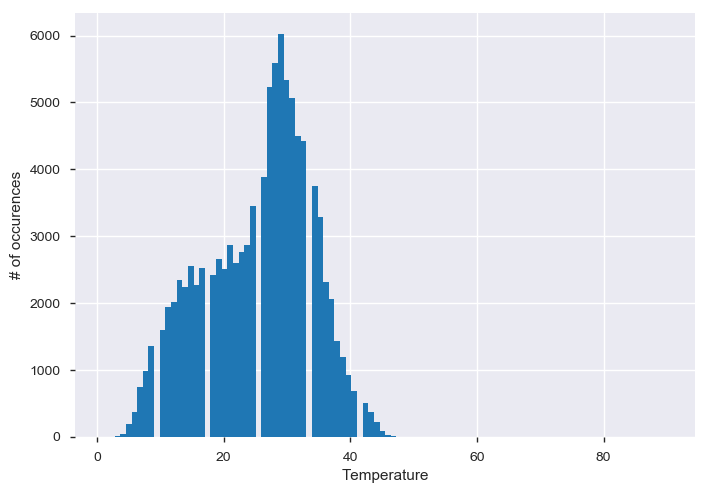

In [56]:

plt.hist(data['Temperature'], bins=100, histtype='stepfilled')
plt.xlabel("Temperature")
plt.ylabel("# of occurences")
plt.show()

In [27]:
cond = {b:a for a, b in enumerate(data[' _conds'].unique())}

KeyError: ' _conds'

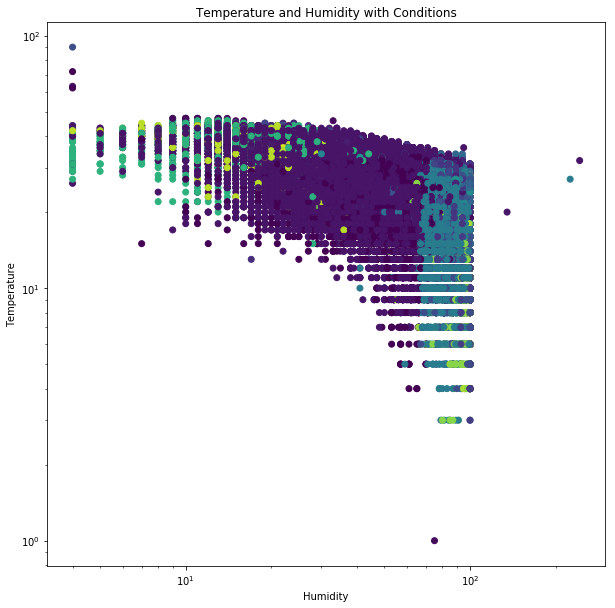

In [56]:
plt.figure(figsize=(10,10))
plt.scatter(data[' _hum'], data[' _tempm'], c=[cond[e] for e in data[' _conds']])
plt.title('Temperature and Humidity with Conditions')
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.xscale('log')
plt.yscale('log')
plt.show()

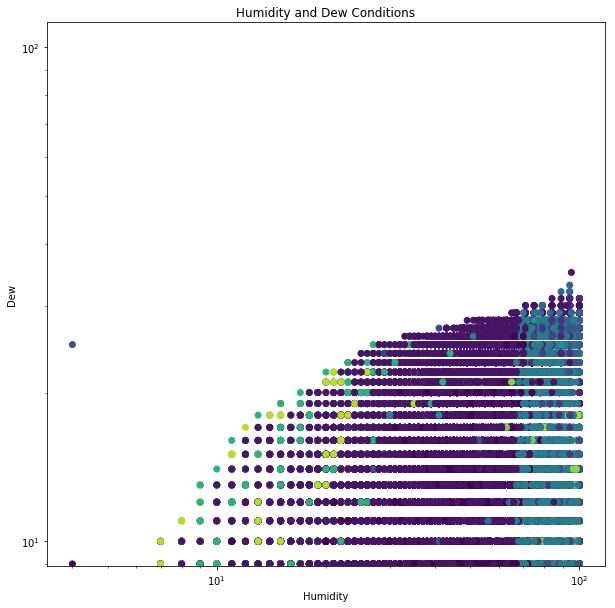

In [57]:
plt.figure(figsize=(10,10))
plt.scatter(data[' _hum'], data[' _dewptm'], c=[cond[e] for e in data[' _conds']])
plt.title('Humidity and Dew Conditions')
plt.xlabel('Humidity')
plt.ylabel('Dew')
plt.xscale('log')
plt.yscale('log')
plt.show()

## Word Cloud Visualization 

In [58]:
#text = originaldata[' _conds '].str.cat(sep=' ')

In [59]:
# Generate a word cloud image
#wordcloud = WordCloud().generate(text)
#plt.imshow(wordcloud, interpolation='bilinear')
#plt.axis("off")

## some more visualization

In [64]:
sns.violinplot("_conds", "_pressurem", data=originaldata,
               palette=["lightblue", "purple"]);

ValueError: Could not interpret input '_conds'

## cleaning data and missing values

In [8]:
print (originaldata.shape)
print (originaldata.columns)
print (originaldata.isnull().sum())

(100990, 20)
Index(['datetime_utc', ' _conds', ' _dewptm', ' _fog', ' _hail',
       ' _heatindexm', ' _hum', ' _precipm', ' _pressurem', ' _rain', ' _snow',
       ' _tempm', ' _thunder', ' _tornado', ' _vism', ' _wdird', ' _wdire',
       ' _wgustm', ' _windchillm', ' _wspdm'],
      dtype='object')
datetime_utc         0
 _conds             72
 _dewptm           621
 _fog                0
 _hail               0
 _heatindexm     71835
 _hum              757
 _precipm       100990
 _pressurem        232
 _rain               0
 _snow               0
 _tempm            673
 _thunder            0
 _tornado            0
 _vism            4428
 _wdird          14755
 _wdire          14755
 _wgustm         99918
 _windchillm    100411
 _wspdm           2358
dtype: int64


so the _conds, _dewptm, _heatindexm, _hum, _precipm, _pressurem, _tempm, _vism, _wdird, _wdire, _wgustm, _windchillm and _wspdm has null values

In [10]:
print (originaldata["_conds"].value_counts()) #The most frequent value in this column is "Staff Nurse"
print (originaldata["_dewptm"].value_counts()) #The most frequent value in this column is "full_time"
print (originaldata["_heatindexm"].value_counts()) #The most frequent value in this column is "permanent"
print (originaldata["_precipm"].value_counts())
print (originaldata["_pressurem"].value_counts())
print (originaldata["_tempm"].value_counts())
print (originaldata["_vism"].value_counts())
print (originaldata["_wdird"].value_counts())
print (originaldata["_wdire"].value_counts())
print (originaldata["_wgustm"].value_counts())
print (originaldata["_windchillm"].value_counts())
print (originaldata["_wspdm"].value_counts())

KeyError: '_conds'

## Data Preprocessing

In [4]:
# preprocessing

#get rid of useless columns
salary = salary.drop(['LocationRaw', 'SalaryRaw', 'SourceName'], axis=1)

#this loop does preprocessing on columns that are strings
for n in salary.columns:
    if salary[n].dtype == 'object':
        salary[n] = salary[n].str.lower()
        salary[n] = salary[n].str.strip()

#replace null values with the mode (most frequent occurence in the feature)
salary['Title'].fillna(value=salary['Title'].value_counts().axes[0][0], inplace=True)
salary['ContractType'].fillna(value=salary['ContractType'].value_counts().axes[0][0], inplace=True)
salary['ContractTime'].fillna(value=salary['ContractTime'].value_counts().axes[0][0], inplace=True)
salary['Company'].fillna(value=salary['Company'].value_counts().axes[0][0], inplace=True)
print (salary.shape)

(10000, 9)


In [5]:
#tf-idf
#first we create vector using only 1000 words and removing useless stop words
#we just consider words that matter to the target variable (salary)
vector = TfidfVectorizer(stop_words='english', max_features=1000)
titleVectorized = pd.DataFrame(vector.fit_transform(salary.Title).toarray(), columns = vector.get_feature_names())
descriptionVectorized = pd.DataFrame(vector.fit_transform(salary.FullDescription).toarray(), columns = vector.get_feature_names())
companyVectorized = pd.DataFrame(vector.fit_transform(salary.Company).toarray(), columns = vector.get_feature_names())
categoryVectorized = pd.DataFrame(vector.fit_transform(salary.Category).toarray(), columns = vector.get_feature_names())
#salary = salary.drop('FullDescription', axis=1)
salary = pd.concat([salary.drop(['Title','FullDescription','Company','Category'], axis=1), titleVectorized,descriptionVectorized,companyVectorized,categoryVectorized], axis=1)
print (salary.shape)

(10000, 3050)


In [ ]:
#preprocess categorical features
#salary = pd.get_dummies(salary, columns=['Title', 'LocationNormalized', 'ContractTime', 'ContractType', 'Company', 'Category'], prefix=['Title', 'LocationNormalized', 'ContractTime', 'ContractType', 'Company', 'Category'])
salary = pd.get_dummies(salary, columns=['LocationNormalized', 'ContractTime', 'ContractType'], prefix=['LocationNormalized', 'ContractTime', 'ContractType'])
print (salary.shape)

## Training and Testing Models

In [ ]:
#split dataset into training and testing 80% 20%
X = salary.drop('SalaryNormalized', axis=1)
Y = salary.SalaryNormalized
pca = PCA(n_components=1000)
pca.fit(X)
X = pca.transform(X)
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, random_state=int(time.time()), test_size=0.20)

## Models I will be using for analysis
1. Supervised Learning
2. Unsupervised Learning
3. Cluster 
4. Association analysis
5. ROC curves

## Linear Regression

In [ ]:
lr = LinearRegression().fit(xTrain, yTrain)

#print("lr.coef_:", lr.coef_)
#print("lr.intercept_:", lr.intercept_)

print("Training set score: {:.2f}".format(lr.score(xTrain, yTrain)))
print("Test set score: {:.2f}".format(lr.score(xTest, yTest)))

## Ridge Regression

In [ ]:
ridge = Ridge().fit(xTrain, yTrain)
print("Training set score: {:.2f}".format(ridge.score(xTrain, yTrain)))
print("Test set score: {:.2f}".format(ridge.score(xTest, yTest)))

## Decision Trees

In [ ]:
tree1 = DecisionTreeRegressor(max_depth=5).fit(xTrain, yTrain)
tree2 = DecisionTreeRegressor(max_depth=10).fit(xTrain, yTrain)
print ("Tree of depth 5 Training set score: {:.2f}".format(tree1.score(xTrain, yTrain)))
print ("Tree of depth 5 Test set score: {:.2f}".format(tree1.score(xTest, yTest)))
print ("Tree of depth 10 Training set score: {:.2f}".format(tree2.score(xTrain, yTrain)))
print ("Tree of depth 10 Test set score: {:.2f}".format(tree2.score(xTest, yTest)))
#higher depth means overfitting to the training data and lower accuracy on the testing data

## K-Nearest Neighbors

In [ ]:
for n in range(2,12):
    # this loop tries number of neighbors from 2 to 11
    knn = KNeighborsRegressor(n_neighbors=n)
    # KNN with 6 neighbors was found to be the most accurate in general
    knn.fit(xTrain, yTrain)
    print ("Training set score with " + str(n) + " neighbors: {:.2f}".format(knn.score(xTrain, yTrain)))
    print ("Test set score with " + str(n) + " neighbors: {:.2f}".format(knn.score(xTest, yTest)))

## Gradient Boosted Regression

In [ ]:
gbr = GradientBoostingRegressor()
gbr.fit(xTrain, yTrain)
print("Training set score: {:.3f}".format(gbr.score(xTrain, yTrain)))
print("Test set score: {:.3f}".format(gbr.score(xTest, yTest)))

## Conclusions